In [1]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import layers
from keras import models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

imdb_dir = './aclImdb/'
train_dir = os.path.join(imdb_dir, 'train')

labels = list()
texts = list()

for label_type in ['neg','pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [3]:
maxlen = 100 #keep only the last 100 elements of every vector sequence
training_samples = 200 #train on only 200 reviews
validation_samples = 10000 #validate on 10000 reviews
max_words = 1000 #Restrict dictionary to the 1000 most common words across all reviews

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index #dictionary of unique words

In [4]:
print('Found {0} unique words'.format(len(word_index)))

Found 88582 unique words


In [6]:
data = pad_sequences(sequences, maxlen=maxlen)

In [7]:
labels = np.asarray(labels)

In [8]:
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [9]:
indices = np.arange(data.shape[0])
indices

array([    0,     1,     2, ..., 24997, 24998, 24999])

In [10]:
np.random.shuffle(indices)
indices

array([21708, 14901,  6069, ...,  6747,  4851, 14879])

In [11]:
data = data[indices]
labels = labels[indices]

In [12]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples + validation_samples]
y_val = labels[training_samples:training_samples + validation_samples]

In [13]:
y_train

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [14]:
#Next we import the Stanford GloVe directory

glove_dir = './glove/'
embeddings_index = dict()

f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors' %len(embeddings_index))

Found 400000 word vectors


In [15]:
i = 0
for key in embeddings_index.keys():
    print(key)
    i += 1
    if(i>=20):
        break

the
,
.
of
to
and
in
a
"
's
for
-
that
on
is
was
said
with
he
as


In [16]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [17]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.071953  ,  0.23127   ,  0.023731  , ..., -0.71894997,
         0.86894   ,  0.19539   ],
       ...,
       [ 0.25066999,  0.5499    ,  0.68014997, ..., -0.62599999,
        -0.10563   , -0.075515  ],
       [ 0.23182   , -0.35374001, -0.067178  , ..., -0.34251001,
         0.87474   ,  0.12929   ],
       [ 0.69148999, -0.31051001,  0.49737   , ..., -0.32271001,
        -0.50286001,  0.20223001]])

In [18]:
model = models.Sequential()

model.add(layers.Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          100000    
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 420,065
Trainable params: 420,065
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.layers

In [20]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [21]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 14s 293ms/step - loss: 1.9335 - acc: 0.5298 - val_loss: 0.6923 - val_acc: 0.5132
Epoch 2/10
7/7 [==============================] - 1s 197ms/step - loss: 0.5919 - acc: 0.7816 - val_loss: 0.7974 - val_acc: 0.4950
Epoch 3/10
7/7 [==============================] - 1s 165ms/step - loss: 0.5150 - acc: 0.7515 - val_loss: 0.6957 - val_acc: 0.5338
Epoch 4/10
7/7 [==============================] - 1s 166ms/step - loss: 0.4802 - acc: 0.8286 - val_loss: 1.5237 - val_acc: 0.4952
Epoch 5/10
7/7 [==============================] - 1s 209ms/step - loss: 0.4902 - acc: 0.8532 - val_loss: 0.6959 - val_acc: 0.5480
Epoch 6/10
7/7 [==============================] - 1s 166ms/step - loss: 0.3130 - acc: 0.9137 - val_loss: 0.9891 - val_acc: 0.4952
Epoch 7/10
7/7 [==============================] - 1s 186ms/step - loss: 0.2722 - acc: 0.9015 - val_loss: 1.9218 - val_acc: 0.5113
Epoch 8/10
7/7 [==============================] - 1s 176ms/step - loss: 0.7642 - acc: 0.7

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

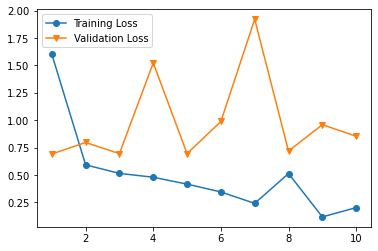

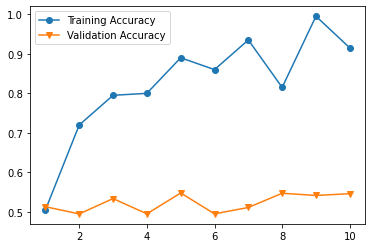

In [23]:
epochs = list(np.linspace(1, len(history_dict['loss']), len(history_dict['loss'])))

training_loss = history_dict['loss']
training_acc = history_dict['acc']
validation_loss = history_dict['val_loss']
validation_acc = history_dict['val_acc']

plt.plot(epochs, training_loss, marker='o', label='Training Loss')
plt.plot(epochs, validation_loss, marker='v', label='Validation Loss')
plt.legend()
plt.show()

plt.figure()

plt.plot(epochs, training_acc, marker='o', label='Training Accuracy')
plt.plot(epochs, validation_acc, marker='v', label='Validation Accuracy')
plt.legend()
plt.show()

In [24]:
test_dir = os.path.join(imdb_dir, 'test')

labels = list()
texts = list()

for label_type in ['neg','pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [25]:
sequences = tokenizer.texts_to_sequences(texts)

In [26]:
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [27]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.8677 - acc: 0.5385


[0.8677183389663696, 0.5385199785232544]